In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive
import cv2
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/krupamay/ML_Assignment/gurmukhi/')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping




Mounted at /content/drive


In [2]:
def load_images_from_directory(image_directory, image_size):
    images = []
    labels = []

    for label, class_folder in enumerate(os.listdir(image_directory)):
        class_path = os.path.join(image_directory, class_folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, image_size)
            images.append(resized_image)
            labels.append(label)

    images = np.array(images)/255.0  # Normalize pixel values
    labels = np.array(labels)

    return images, labels

In [110]:
train_directory = '/content/drive/My Drive/krupamay/ML_Assignment/gurmukhi/train/'
val_directory = '/content/drive/My Drive/krupamay/ML_Assignment/gurmukhi/val/'
image_size=(64,64)


In [111]:
X_train, y_train = load_images_from_directory(train_directory, image_size)
X_val, y_val = load_images_from_directory(val_directory, image_size)

In [115]:
X_train.shape

(1000, 64, 64)

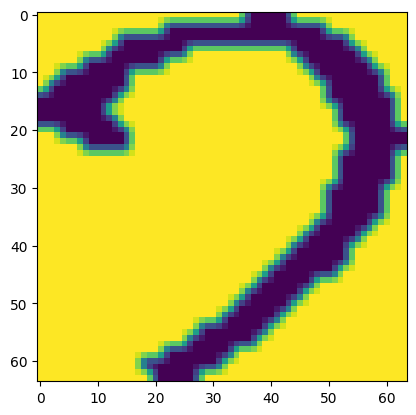

In [116]:
import matplotlib.pyplot as plt
plt.imshow(X_train[200])

In [117]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_val.reshape(X_val.shape[0], -1)


In [118]:
X_train_flattened.shape

(1000, 4096)

In [119]:
X_train_flattened[0]


array([1., 1., 1., ..., 1., 1., 1.])

In [120]:
num_classes = 10


In [138]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

model = Sequential([
    Flatten(input_shape=(X_train_flattened.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout layer
    Dense(num_classes, activation='sigmoid')
])


In [139]:

# Compiling the model with a custom learning rate
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train_flattened, y_train, epochs=100,batch_size=15, validation_data=(X_test_flattened, y_val), callbacks=[early_stopping])



Epoch 1/100
67/67 [==============================] - 4s 46ms/step - loss: 4.9161 - accuracy: 0.1530 - val_loss: 3.4147 - val_accuracy: 0.0899
Epoch 2/100
67/67 [==============================] - 2s 28ms/step - loss: 3.1581 - accuracy: 0.2180 - val_loss: 3.3542 - val_accuracy: 0.2079
Epoch 3/100
67/67 [==============================] - 2s 27ms/step - loss: 2.7301 - accuracy: 0.3350 - val_loss: 3.5669 - val_accuracy: 0.1067
Epoch 4/100
67/67 [==============================] - 2s 27ms/step - loss: 2.2765 - accuracy: 0.4850 - val_loss: 3.8012 - val_accuracy: 0.0506
Epoch 5/100
67/67 [==============================] - 2s 27ms/step - loss: 2.0788 - accuracy: 0.5440 - val_loss: 4.5777 - val_accuracy: 0.0730
Epoch 6/100
67/67 [==============================] - 2s 27ms/step - loss: 1.9365 - accuracy: 0.5360 - val_loss: 5.0764 - val_accuracy: 0.0618
Epoch 7/100
67/67 [==============================] - 2s 35ms/step - loss: 1.8991 - accuracy: 0.5500 - val_loss: 4.6842 - val_accuracy: 0.0169
Epoch 

In [154]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 4096)              0         
                                                                 
 dense_82 (Dense)            (None, 512)               2097664   
                                                                 
 dropout_62 (Dropout)        (None, 512)               0         
                                                                 
 dense_83 (Dense)            (None, 256)               131328    
                                                                 
 dropout_63 (Dropout)        (None, 256)               0         
                                                                 
 dense_84 (Dense)            (None, 128)               32896     
                                                                 
 dropout_64 (Dropout)        (None, 128)             

In [155]:
model.evaluate(X_test_flattened, y_val)

6/6 [==============================] - 0s 6ms/step - loss: 3.3542 - accuracy: 0.2079


[3.354159355163574, 0.2078651636838913]

In [141]:
y_predicted = model.predict(X_test_flattened)


6/6 [==============================] - 0s 6ms/step


In [142]:
loss, accuracy = model.evaluate(X_test_flattened, y_val)

print(f"Validation accuracy: {accuracy * 100:.2f}%")


6/6 [==============================] - 0s 6ms/step - loss: 3.3542 - accuracy: 0.2079
Validation accuracy: 20.79%


In [149]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [144]:
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  4,  0,  3,  0,  9,  1],
       [ 0,  0,  0,  0,  5,  0,  0,  1,  9,  2],
       [ 0,  1,  7,  0,  2,  0,  0,  0,  6,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5, 13],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 18]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

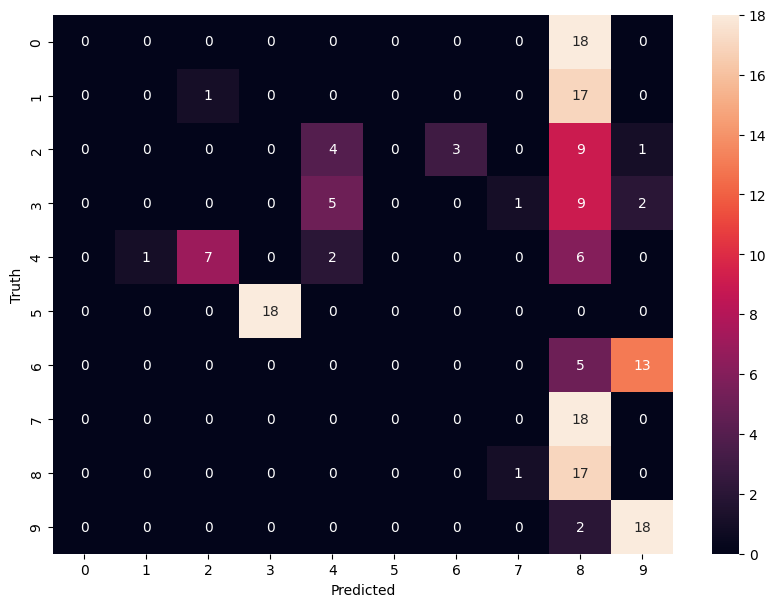

In [145]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_predicted_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        17
           4       0.18      0.12      0.15        16
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        18
           8       0.17      0.94      0.29        18
           9       0.53      0.90      0.67        20

    accuracy                           0.21       178
   macro avg       0.09      0.20      0.11       178
weighted avg       0.09      0.21      0.12       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


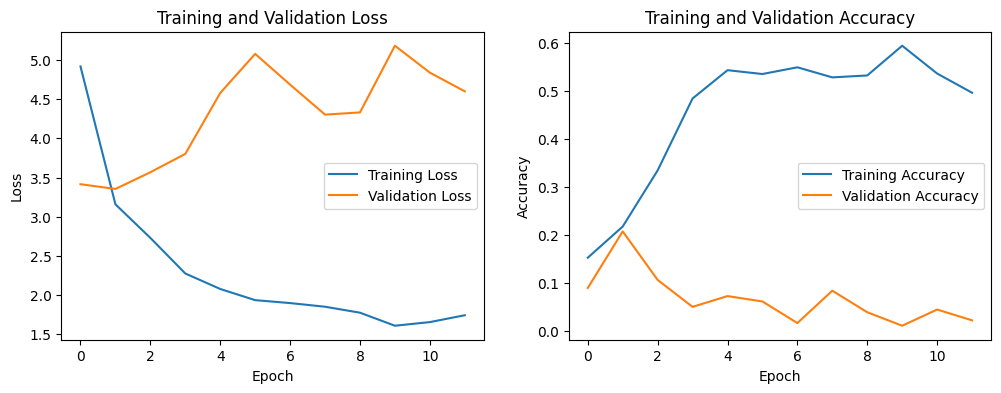

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


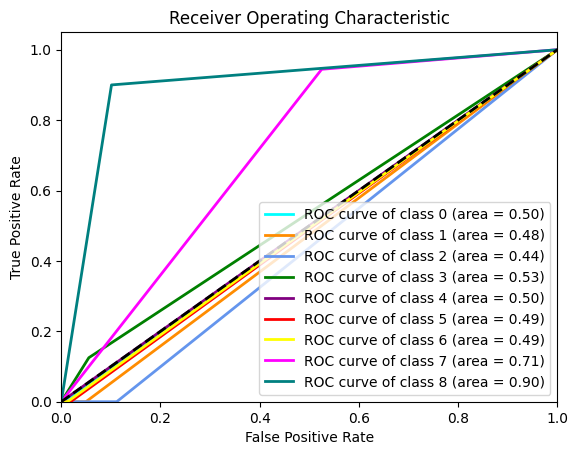

In [153]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_val_bin = label_binarize(y_val, classes=[1,2,3,4,5,6,7,8,9]) 
y_predicted_bin = label_binarize(y_predicted_labels, classes=[1,2,3,4,5,6,7,8,9]) 

n_classes = y_val_bin.shape[1]

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_predicted_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = [
    'aqua', 
    'darkorange', 
    'cornflowerblue', 
    'green', 
    'purple', 
    'red', 
    'yellow', 
    'magenta', 
    'teal', 
    'brown'
]
# Plotting ROC curve for each class
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
